<a href="https://colab.research.google.com/github/3corneredhat/AI-Assignment-4-Voice-Kit/blob/main/CS3793_5233_assignment1_xex967.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTSA CS 3793/5233: Assignment-1

**Cabrera - Alan- xex967**






## Learning Objectives


*   Read data from a file and Create a graph
*   Implement Uninformed & Informed searching strategies
*   Apply different searching strategies for the given problem
*   Analyze and Compare the searching strategies


## Description

This assignment is focused on **python file reading, graph creation** and implementation of **search algorithms**. 
In the following sections, you will complete a series of tasks for a made up problem of *Coronavirus in Texas*.

*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread (Uninformed Search).
*   To counter the effect of the virus, vaccine needs to be distributed to all cities. One city has more demand than supply, whereas one city has a shortage of vaccines. The goal is to find an **optimal** strategy to transport the vaccine (Informed Search) from the city with high supply (low demand) to the city with low supply (high demand).

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library for the search algorithms. You can get pieces of code from online, but please cite the source properly.


#Reading Data Files & Creating a 2D Graph

##(45 points)

In this section, you will write code to read the data files provided, cities.csv and distances.csv, and create a 2D graph consisting of nodes and edges. The goal is to use this graph for the 2 search agents that you will create in the next section.

Provided with this lab, on Blackboard, you will find 2 csv files:

*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```
The above line means that San Antonio is located at the latitude and longitude of 29.4685 N and 98.5254 W respectively. Note that the '-ve' sign denotes 'S' for latitude and 'W' for longitude. While performing calculations you will need to ignore the sign.

*   **distances.csv** - This file contains distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```
The above line denotes that there should be an edge between *San Antonio* and *New Braunfels* and the weight on that edge, i.e. the distance, is *30.80876734*.

In the code blocks below, handle the logic for the graph. Load the graph data from the give files and display a 2D graph of the given data, with labeled nodes and edges. Create as many functions or code blocks as needed.

##Extra Credit (4 points)

Overlay the 2D graph on an image of the Texas state map.





In [ ]:
# Add only your imports here
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import networkx as nx
import geopy
from queue import PriorityQueue

In [ ]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# https://docs.python.org/3/library/csv.html
# https://www.geeksforgeeks.org/directed-graphs-multigraphs-and-visualization-in-networkx/
# https://www.geeksforgeeks.org/networkx-python-software-package-study-complex-networks/
# https://stackoverflow.com/questions/42558165/load-nodes-with-attributes-and-edges-from-dataframe-to-networkx
# https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
# https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6
# https://stackoverflow.com/questions/3567018/how-can-i-specify-an-exact-output-size-for-my-networkx-graph
# https://stackoverflow.com/questions/32488772/drawing-nodes-with-coordinates-in-correct-position-using-networkx-matplotlib
# https://stackoverflow.com/questions/64986306/how-to-plot-a-networkx-graph-using-the-x-y-coordinates-of-the-points-list
# https://stackoverflow.com/questions/56994061/how-to-make-x-and-y-axes-appear-when-using-networkx-and-matplotlib
# https://stackoverflow.com/questions/14770735/how-do-i-change-the-figure-size-with-subplots

#initialize the graph
G = nx.Graph()
#read in each file
df1 = pd.read_csv(basePath + "cities.csv", names=["city","lat","lon"])
df2 = pd.read_csv(basePath + "distances.csv", names=["city1", "city2", "dist"])
#create lists from cities.csv
cities = df1["city"].values.tolist()
x_coor = df1["lon"].values.tolist()
y_coor = df1["lat"].values.tolist()
#create lists from distances.csv
city1 = df2["city1"].values.tolist()
city2 = df2["city2"].values.tolist()
dist = df2["dist"].values.tolist()

#process the data frame for cities
for i in range(0,len(df1.index)):
  G.add_node(cities[i],pos = (x_coor[i],y_coor[i]))
#process the data frame for distances
for j in range(0,len(df2.index)):
  G.add_edge(city1[j], city2[j], dist=dist[j])

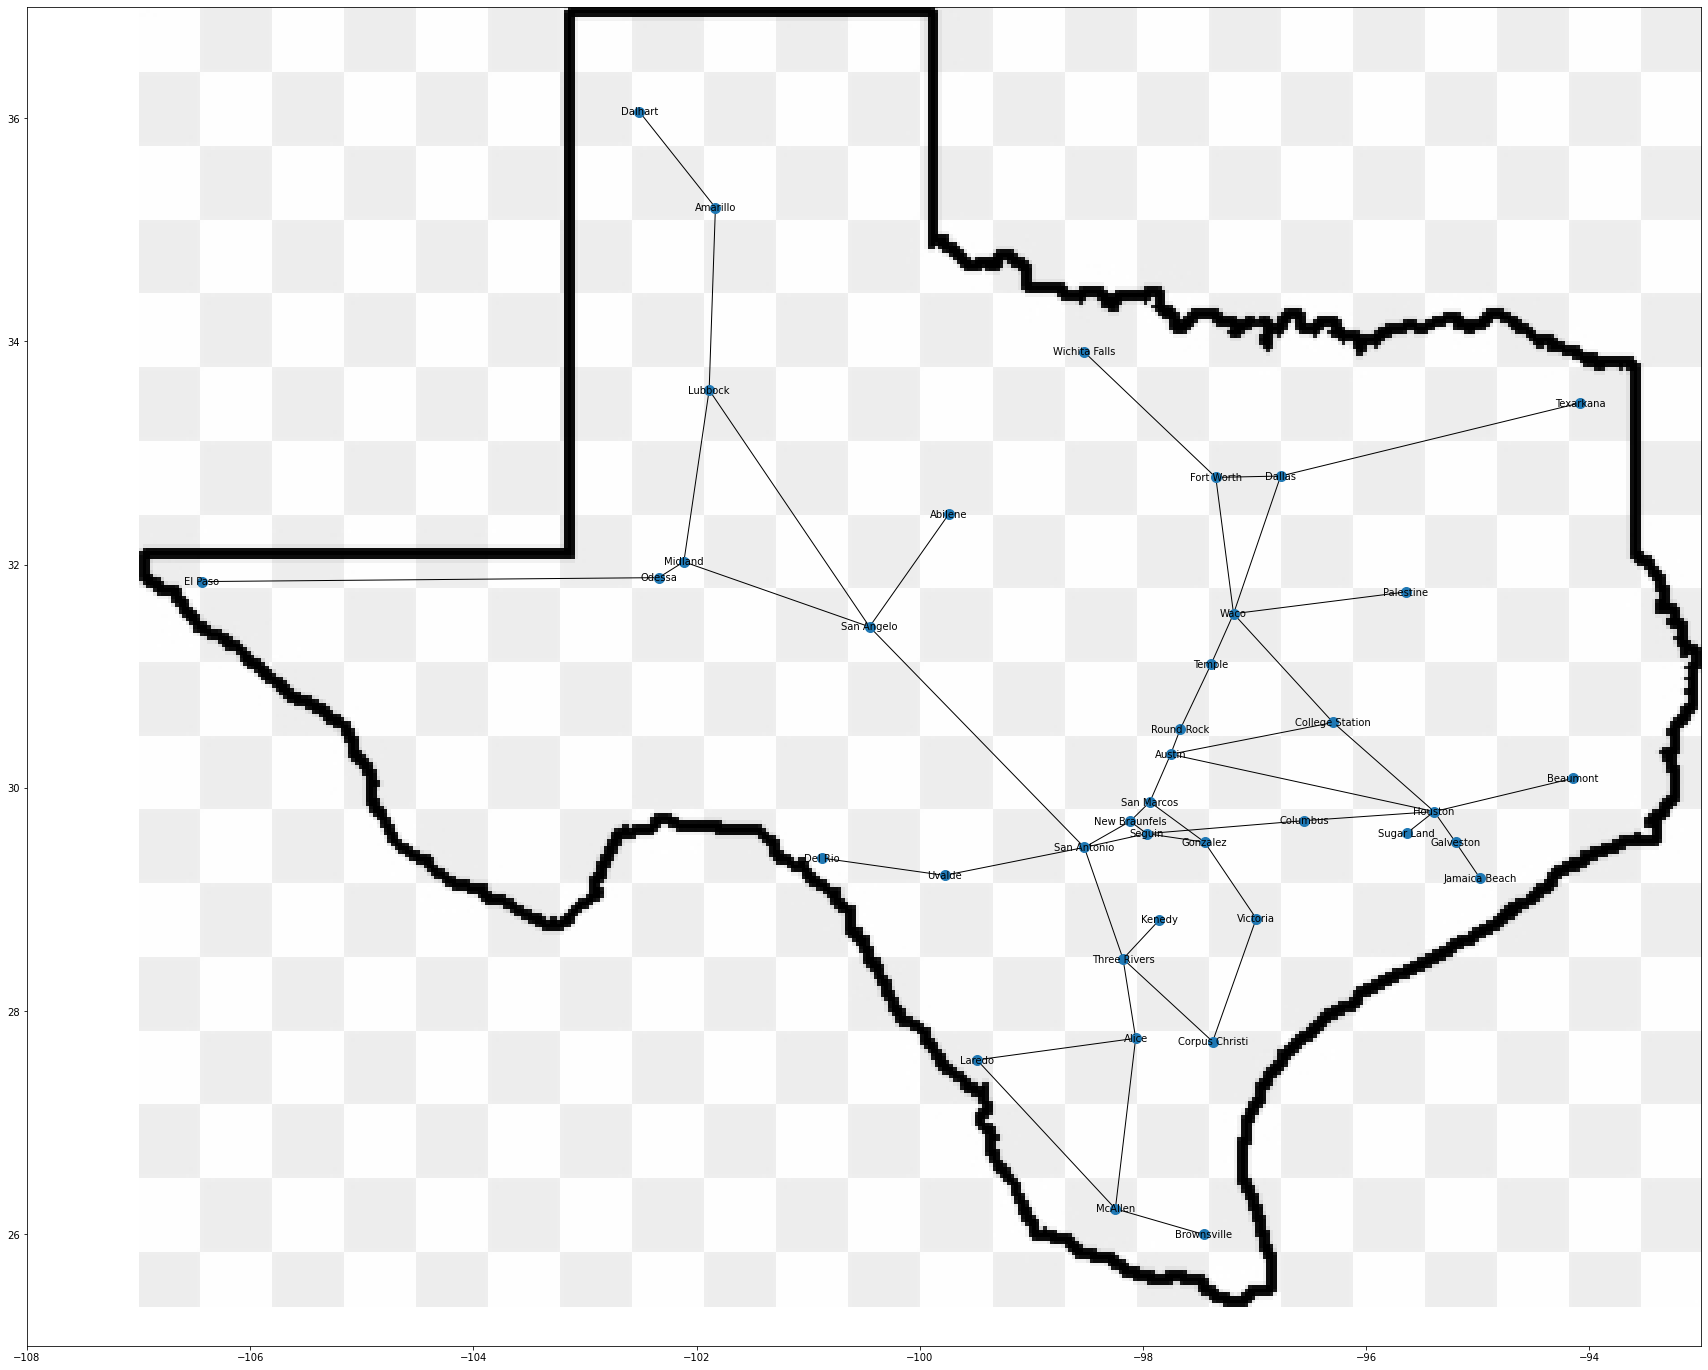

In [ ]:
# Display a 2D graph of the given data.

image = img.imread( basePath + "texas-map.png")

fig, ax = plt.subplots() #initialize subplots
#set height and width
fig.set_figheight(30)
fig.set_figwidth(30)
#plot the graph
nx.draw_networkx(G, nx.get_node_attributes(G, 'pos'), with_labels=True,
                  node_size=100, font_size=10)
#show the map
plt.imshow(image, extent=(-107,-93,25.35,37))
plt.axis("on") #add the axis
#set the plane limits
ax.set_xlim(-108, -93)
ax.set_ylim(25,37)
#add ticks
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
#show the graphic
plt.show()

#Virus Spread - Uninformed Search Agent

##(40 points)

In this section, you will use the graph created in the previous section and create an *uninformed search* agent that will print the path how the virus will spread to all the provided Texas cities. The first confirmed case of the virus was in **Three Rivers** and starts spreading from there. The virus does not discriminate and it needs to spread to all the cities of Texas.

In the following code block, write code to implement **any** uninformed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path or sequence of cities that will be infected by the spread of Coronavirus.
*   The distance travelled by the selected virus spreading strategy.

##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

Virus spread path:
1. Three Rivers
2. San Antonio
3. Corpus Christi
4. Alice
5. Kenedy
6. San Angelo
7. New Braunfels
8. Seguin
9. Uvalde
10. Victoria
11. Laredo
12. McAllen
13. Midland
14. Lubbock
15. Abilene
16. San Marcos
17. Gonzalez
18. Columbus
19. Del Rio
20. Brownsville
21. Odessa
22. Amarillo
23. Austin
24. Houston
25. El Paso
26. Dalhart
27. Round Rock
28. College Station
29. Beaumont
30. Galveston
31. Sugar Land
32. Temple
33. Waco
34. Jamaica Beach
35. Palestine
36. Fort Worth
37. Dallas
38. Wichita Falls
39. Texarkana
Total distance traveled:3354.31992298


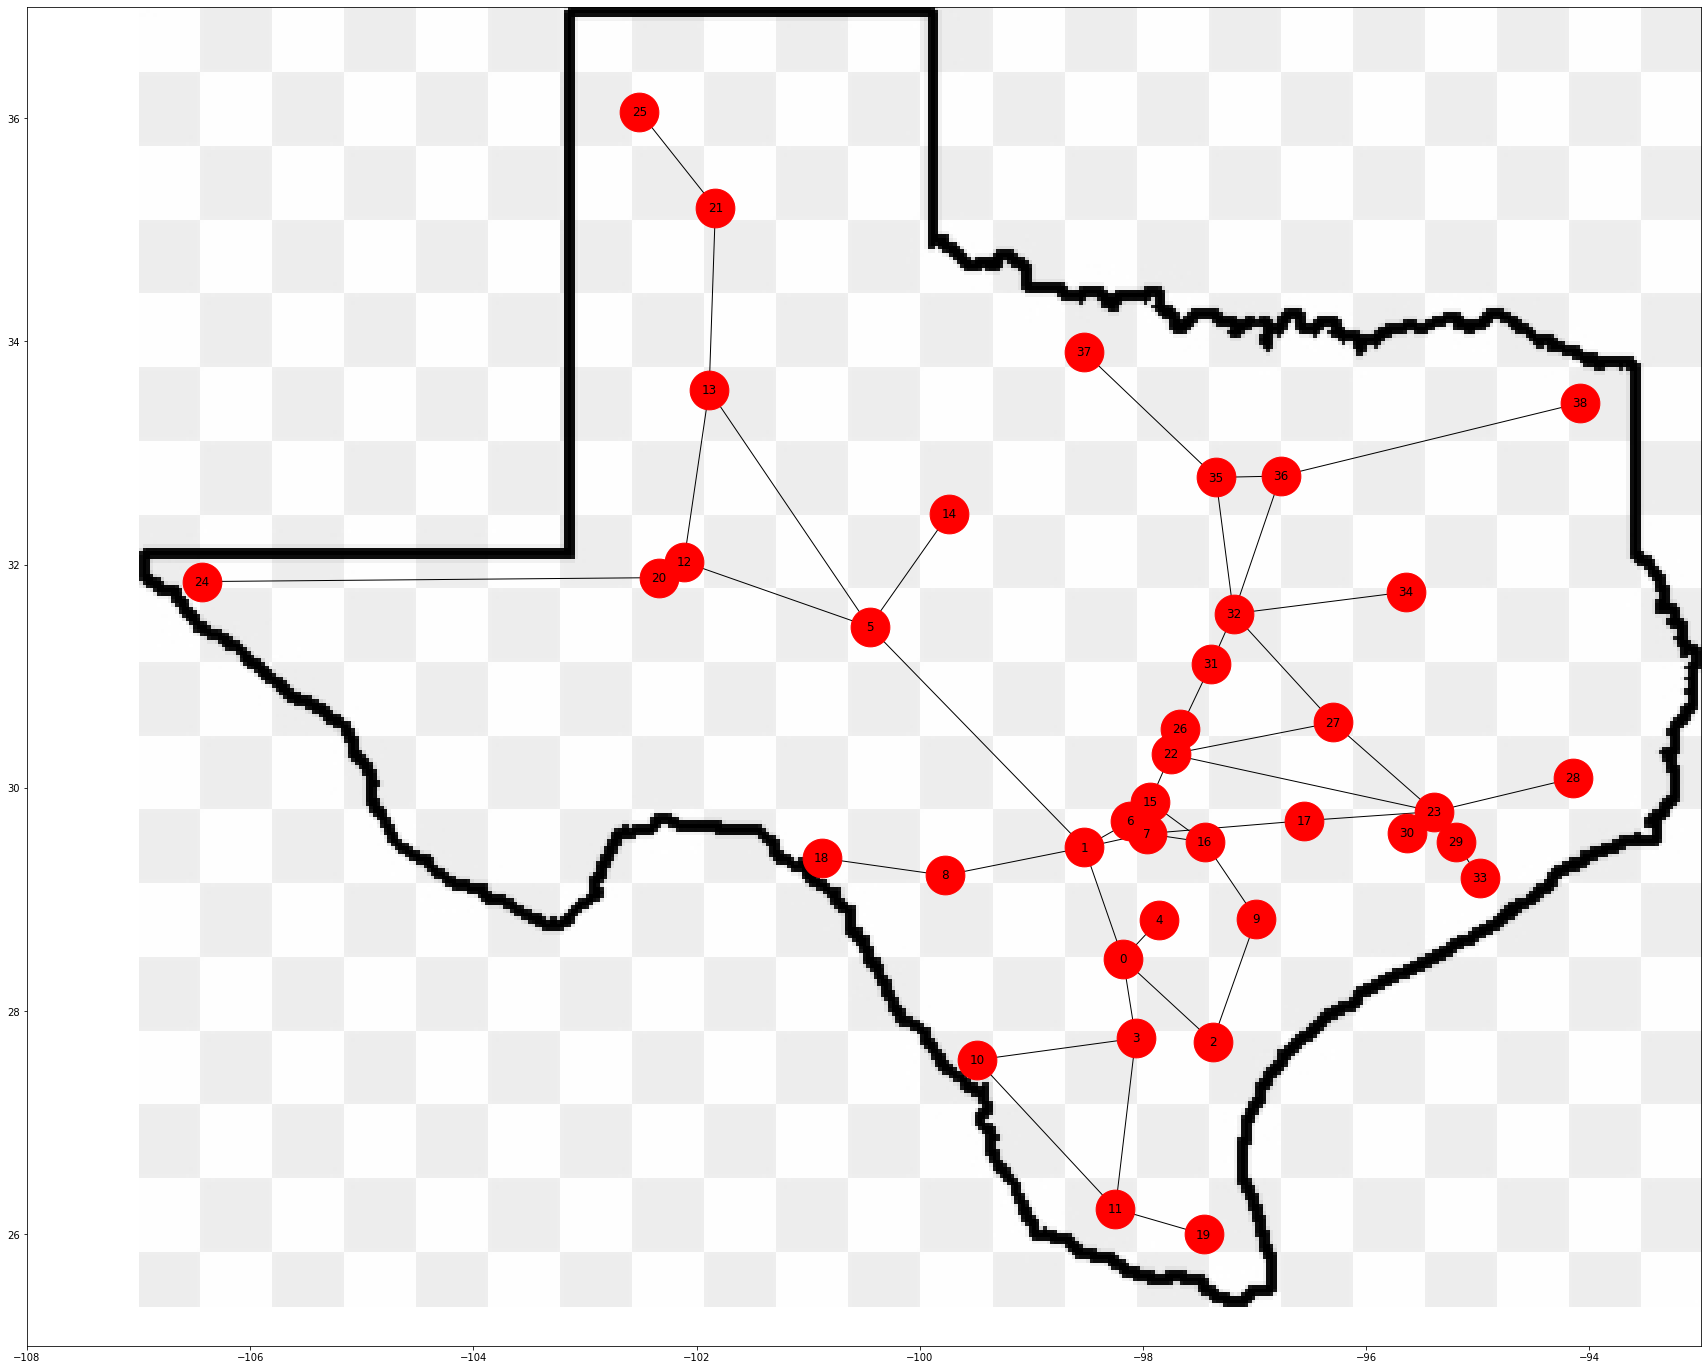

In [ ]:
from os import path
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'

#https://stackoverflow.com/questions/15535655/optional-arguments-in-initializer-of-python-class
#https://realpython.com/lessons/while-loops-and-lists/
#https://stackoverflow.com/questions/15725653/python-check-if-element-is-not-in-two-lists
#https://stackoverflow.com/questions/7002429/how-can-i-extract-all-values-from-a-dictionary-in-python

#The node class
class SearchTreeNode: 
  def __init__(self, state = None, parent=None, action=None, path_cost = None):
    self.state = state
    self.parent = parent
    self.action = action
    self.path_cost = path_cost
#The problem class
class Problem1:
  def __init__(self, initial_state, goal=None):
    self.initial_state = initial_state
    self.goal = goal
  
  #class method
  def actions(self, state):
    action_list = list(G.neighbors(state))
    return action_list
  def goal_test(self,explored):
    return explored == self.goal
  def result(self, state, action):
    return action
  def step_cost(self, state, action):
    return G[state][action]["dist"]

#This function creates a child node.
def child_node(problem, parent, action):
  new_action = (parent.state, action)
  path_cost = problem.step_cost(parent.state, action)
  node = SearchTreeNode(problem.result(parent.state, action), parent, new_action, path_cost)
  return node

#Implementation of pseudocode to the best of my ability
def breadth(problem):
 
  node = SearchTreeNode(problem.initial_state,None,None,0) 
  frontier = [node] #FIFO Queue
  explored = set() #Set for the explored nodes
  path = {}#To keep track of the path and the path cost
  path[node.state]=node.path_cost #keep track of the path taken
  
  while frontier:
    node = frontier.pop(0)#take the first/shallowest node in the frontier
    explored.add(node.state)#expanding or exploring the node
    for action in problem.actions(node.state):#getting nodes in the next 'layer'
      child = child_node(problem, node, action)#visiting (not exploring) a child node
      if child.state not in explored and child.state not in path: #adding child to frontier
        frontier.append(child)
        path[child.state]=child.path_cost #adding node to path
  
  #Additional instructions to print the solution
  total = 0 #To calculate the distance traveled
  count = 0 #To give each city an index
  print("Virus spread path:")
  for x,y in list(path.items()):
    total += y
    count += 1
    print(str(count) + ". " + x)
  print("Total distance traveled:" + str(total))
  return path

traverse_all = Problem1("Three Rivers")
spread = breadth(traverse_all)

###Display a 2D graph of the given data.###

order = list(spread.keys())#turn spread dictionary into list
for x in order: #add spread path order as attribute to each node in graph
  G.nodes[x]['spread'] = order.index(x)

image = img.imread( basePath + "texas-map.png")#read map
fig, ax = plt.subplots() #initialize subplots

#set height and width
fig.set_figheight(30)
fig.set_figwidth(30)

#plot the graph
nx.draw(G, nx.get_node_attributes(G, 'pos'), node_color='red', node_size=1500, ax=ax)
# draw node labels/names in order of spread starting with 0 for the initial state
nx.draw_networkx_labels(G, nx.get_node_attributes(G, 'pos'),nx.get_node_attributes(G, 'spread'))  
#show the map
plt.imshow(image, extent=(-107,-93,25.35,37))
plt.axis("on") #add the axis
#set the plane limits
ax.set_xlim(-108, -93)
ax.set_ylim(25,37)
#add ticks
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
#show the graphic
plt.show()

#Vaccine Transportation - Informed Search Agent

##(40 points)

In this section, you will create an *informed search* agent that will be used to transport the vaccine. The city of **San Antonio** has more supply of vaccine than the demand. The goal is to create an **optimal strategy** to transport the vaccine and make it available at the highly affected city of **College Station**, where there is a shortage of vaccines.

In the following code block, write code to implement an **optimal** informed search strategy. You are free to create more code blocks if needed. As the output, print 

*   The path / sequence of cities that will be visited in the optimal vaccine transportation strategy.
*   The total distance travelled in the optimal vaccine transportation strategy.


##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [ ]:
# Implement an OPTIMAL informed search strategy for distributing the vaccine from 'San Antonio' to 'College Station'
#References:
#https://stackoverflow.com/questions/13698352/storing-and-accessing-node-attributes-python-networkx
#https://geopy.readthedocs.io/en/stable/#module-geopy.distance
#https://networkx.org/documentation/stable/tutorial.html#attributes

####The SearchTreeNodeClass from above is called in this cell###

#class for the problem
class Problem2:
  def __init__(self, state, goal=None):
    self.state = state
    self.goal = goal
  
  #class method
  def actions(self, state):
    action_list = list(G.neighbors(state))
    return action_list
  def goal_test(self,state):
    return state == self.goal
  def result(self, state, action):
    return action
  #Calculates the path cost with Haversine formula
  def step_cost(self, state, action):
    g_n = G[state][action]["dist"]
    h_n = geopy.distance.great_circle(tuple(reversed(G.nodes[state]["pos"])), tuple(reversed(G.nodes[problem.goal]["pos"]))).miles
    return g_n+h_n

#function to create anode
def star_child_node(problem, parent, action):
  new_action = (parent.state, action)
  path_cost = problem.step_cost(parent.state, action)
  node = SearchTreeNode(problem.result(parent.state, action), parent, new_action, path_cost)
  return node

#Implementation of pseudocode to the best of my ability.
#Not functioning. I struggled a lot with relearning python that I ran out of
#sufficient time to implement this algorithm. 

def a_star(problem):

  initial_straight = geopy.distance.great_circle(tuple(reversed(G.nodes[problem.state]["pos"])),tuple(reversed(G.nodes[problem.goal]["pos"]))).miles
  node = SearchTreeNode(problem.state,None,None, 0 + initial_straight) 
  frontier = PriorityQueue() #Priority Queue
  frontier.put(node.path_cost, node)#Place node in queue.
  explored = set() #Set for the explored nodes
  
  while frontier:
    node = frontier.get()
    explored.add(node.state)
    if problem.goal_test(node.state):
      return
    for action in problem.actions(node.state):
      child = star_child_node(problem, node, action)
      if child.state not in explored or child not in frontier:
        frontier.put(child.path_cost, child)

vaccine = Problem2("San Antonio", "College Station")
a_star(vaccine)

AttributeError: ignored

#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (45 points) Reading Data files & Creating a 2D Graph
*   (40 points) Virus Spread - Uninformed Search Agent
*   (40 points) Vaccine Transportation - Informed Search Agent
*   (10 points) Extra Credit - on the Texas map image, overlay the 2D graph and the paths selected by the search agents



